# Treinamento do modelo CLIP

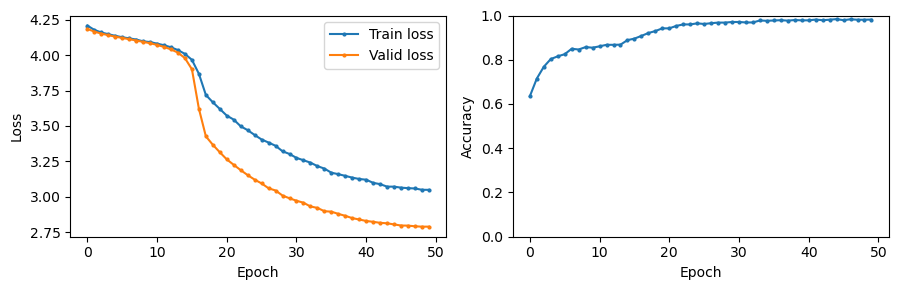

In [1]:
import train
from model import get_model

params = {
    "bs":64,
    "num_epochs":50,
    "lr":0.0001,
    "weight_decay":0.2,  # Weight decay bem maior que nos scripts anteriores!
    "resize_size":224,  
    "seed":0
}

model = get_model()
ds_train, ds_valid, logger = train.train(model, **params)

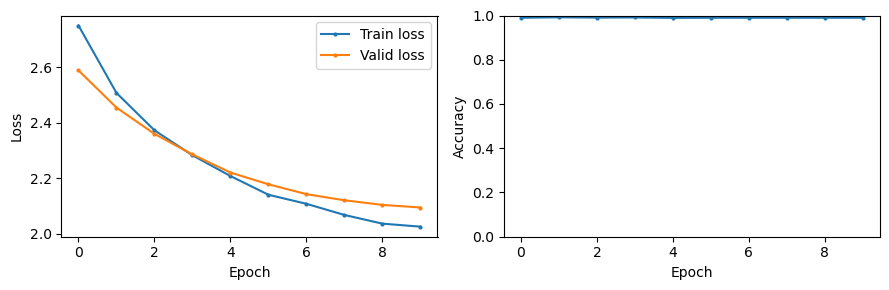

In [2]:
# Treino adicional por algumas épocas do codificador de texto
import torch

params = {
    "bs":64,
    "num_epochs":10,
    "lr":0.0001,
    "weight_decay":0.2,
    "resize_size":224,  # Tamanho das imagens de treinamento
    "seed":0
}

model = get_model(freeze_text=False)
checkpoint = torch.load(
    "../data/checkpoints/M10/best_model_frozen_text.pt")
model.load_state_dict(checkpoint["model"])
ds_train, ds_valid, logger = train.train(model, **params)